# 🧠 Gradient Descent Visualizer
This notebook demonstrates the effect of gradient descent on different mathematical functions using Python and Matplotlib.

## 🔁 Common Gradient Descent Logic

In [1]:

import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(grad_fn, learning_rate, epochs, start_x):
    x = start_x
    history = [x]
    for _ in range(epochs):
        grad = grad_fn(x)
        x -= learning_rate * grad
        history.append(x)
    return history


## 🔷 Function: $f(x) = x^2$

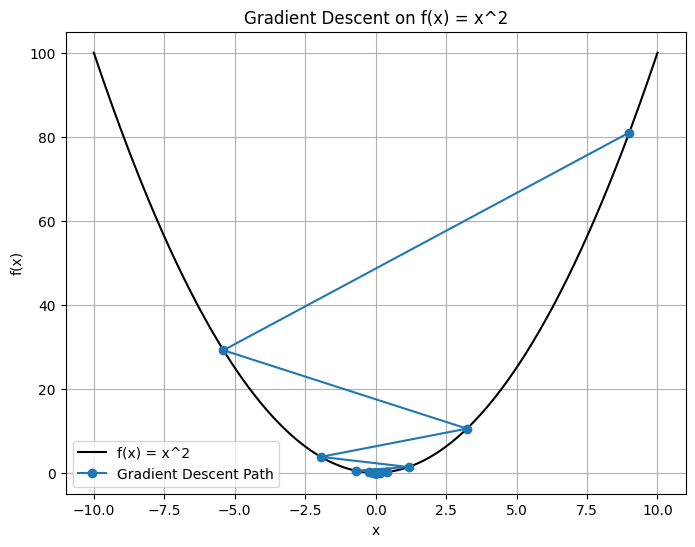

In [3]:

def f_square(x):
    return x ** 2

def df_square(x):
    return 2 * x

x_vals = np.linspace(-10, 10, 400)
y_vals = f_square(x_vals)

history = gradient_descent(df_square, learning_rate=0.8, epochs=20, start_x=9)
history_y = [f_square(p) for p in history]

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label="f(x) = x^2", color="black")
plt.plot(history, history_y, label="Gradient Descent Path", marker='o')
plt.title("Gradient Descent on f(x) = x^2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()


## 🟦 Function: $f(x) = |x|$
Note: This function is not differentiable at x=0, we use the subgradient instead.

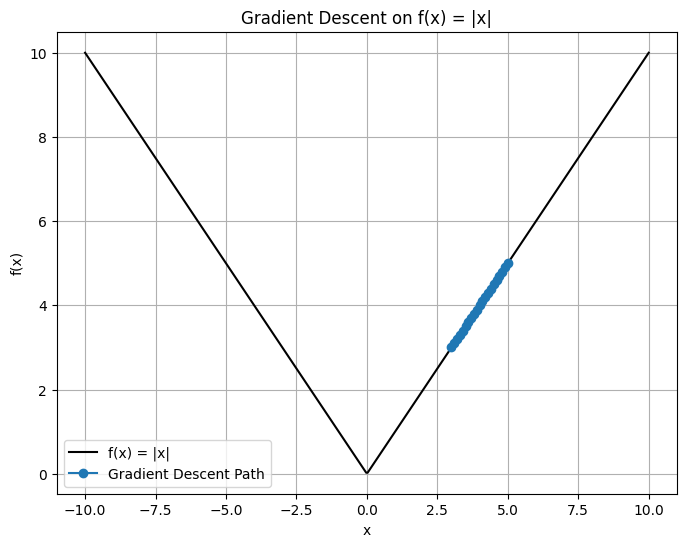

In [3]:

def f_abs(x):
    return np.abs(x)

def df_abs(x):
    return np.where(x > 0, 1, -1)

x_vals = np.linspace(-10, 10, 400)
y_vals = f_abs(x_vals)

history = gradient_descent(df_abs, learning_rate=0.1, epochs=20, start_x=5)
history_y = [f_abs(p) for p in history]

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label="f(x) = |x|", color="black")
plt.plot(history, history_y, label="Gradient Descent Path", marker='o')
plt.title("Gradient Descent on f(x) = |x|")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()


## 🟩 Function: $f(x) = \log(x)$
Note: Only defined for x > 0.

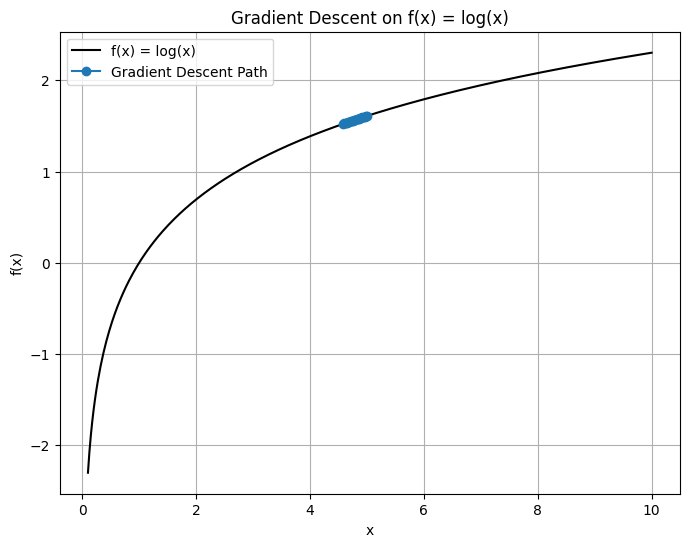

In [4]:

def f_log(x):
    return np.log(x)

def df_log(x):
    return 1 / x

x_vals = np.linspace(0.1, 10, 400)
y_vals = f_log(x_vals)

history = gradient_descent(df_log, learning_rate=0.1, epochs=20, start_x=5)
history_y = [f_log(p) for p in history]

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label="f(x) = log(x)", color="black")
plt.plot(history, history_y, label="Gradient Descent Path", marker='o')
plt.title("Gradient Descent on f(x) = log(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()


## 🟨 Function: $f(x) = \cos(x)$
Demonstrates non-convexity and local minima.

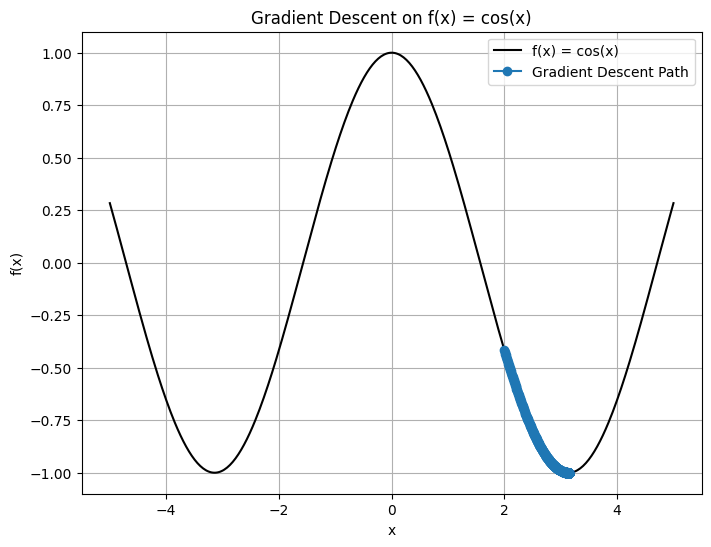

In [8]:

def f_cos(x):
    return np.cos(x)

def df_cos(x):
    return -np.sin(x)

x_vals = np.linspace(-5, 5, 400)
y_vals = f_cos(x_vals)

history = gradient_descent(df_cos, learning_rate=0.01, epochs=20000, start_x=2)
history_y = [f_cos(p) for p in history]

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label="f(x) = cos(x)", color="black")
plt.plot(history, history_y, label="Gradient Descent Path", marker='o')
plt.title("Gradient Descent on f(x) = cos(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()


### 📘 Understanding Learning Rate and Gradient Descent Path

**🔁 Gradient Descent** is an optimization algorithm used to minimize a function by iteratively moving in the direction of the steepest descent — that is, the negative gradient.

Let’s break it down:

---

#### 🔹 What is the Learning Rate?

The **learning rate (η)** is a small scalar that controls **how big each step** is during the descent.
It determines how fast (or slow) the algorithm moves toward the minimum.

- ✅ Too small → Slow convergence (many steps needed)
- ⚠️ Too large → Might overshoot or diverge

Mathematically:
  `x_new = x_old - learning_rate * gradient(x_old)`

---

#### 🔹 What is the Gradient Descent Path?

The **gradient descent path** is the trail of steps the algorithm takes from the initial point toward the function's minimum.
Each point in this path is:
- Computed using the gradient (slope) of the function at the current location
- Aimed at reducing the function’s output value (i.e., moving downhill)

---

#### 🔹 What do the Dots in the Plot Represent?

Each **dot** on the curve represents a **step taken** during gradient descent:
- 📍 The first dot: the **starting point**
- 🔄 Subsequent dots: the positions of the variable after each update
- ✅ The final dot: (ideally) near the **minimum of the function**

These dots let us visualize:
- How fast the algorithm converges
- Whether it oscillates, diverges, or finds the minimum efficiently

---

Together, the learning rate and the plotted dots help us **understand the behavior and stability** of the optimization process.

#### 🔍 What Happens During Gradient Descent?
When we train models or optimize a function using gradient descent, we hope the algorithm converges smoothly to the minimum. But depending on the learning rate, you might observe these behaviors:

#### ✅ Fast Convergence
This is the ideal case.

The steps taken by the algorithm get closer and closer to the minimum, and it reaches it in a small number of iterations.

Imagine walking down a hill using perfectly sized steps — not too short, not too long — and you reach the valley efficiently.

Visual clue: Dots quickly approach the bottom and stop near it.

#### 🔁 Oscillations
The learning rate is a bit too high, so the algorithm keeps jumping over the minimum, back and forth.

It might still converge eventually, but slower, and often less stably.

Like jumping too hard toward the valley and overshooting it, then bouncing back and forth before settling.

Visual clue: Dots move past the minimum and reverse direction multiple times.

#### ⚠️ Divergence
The learning rate is too high, and instead of getting closer to the minimum, the steps get bigger and bigger, moving away from the solution.

Like running down the hill and tripping over, flying far off in the wrong direction.

Visual clue: Dots go farther away from the bottom with each step.

#### 📉 Summary
Behavior	        Learning Rate	Description

✅ Converge	        Good/Optimal	Reaches minimum efficiently

🔁 Oscillate     	Slightly High	Jumps around minimum, slowly converges

⚠️ Diverge	        Too High	Escapes the minimum, becomes unstable